In [61]:
# Kernel -> py311ml
# imports aqui ->
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [53]:
data = pd.read_csv('src/adult.data', header=None, sep=',\s', na_values=["?"], engine='python')
data.columns = ['age', 'workclass', 'final-weight', 'education', 'education-num', 'marital-status',
                 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                   'hours-per-week', 'native-country', 'income']


def check_df(dataframe, head=5):
    print("------------ Shape ------------")
    print(dataframe.shape)
    print("------------ Types ------------")
    print(dataframe.dtypes)
    
check_df(data)

------------ Shape ------------
(32561, 15)
------------ Types ------------
age                int64
workclass         object
final-weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [55]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print(numerical_cols)
print(categorical_cols)

Index(['age', 'final-weight', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


In [56]:
data.isnull().sum()

age                  0
workclass         1836
final-weight         0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

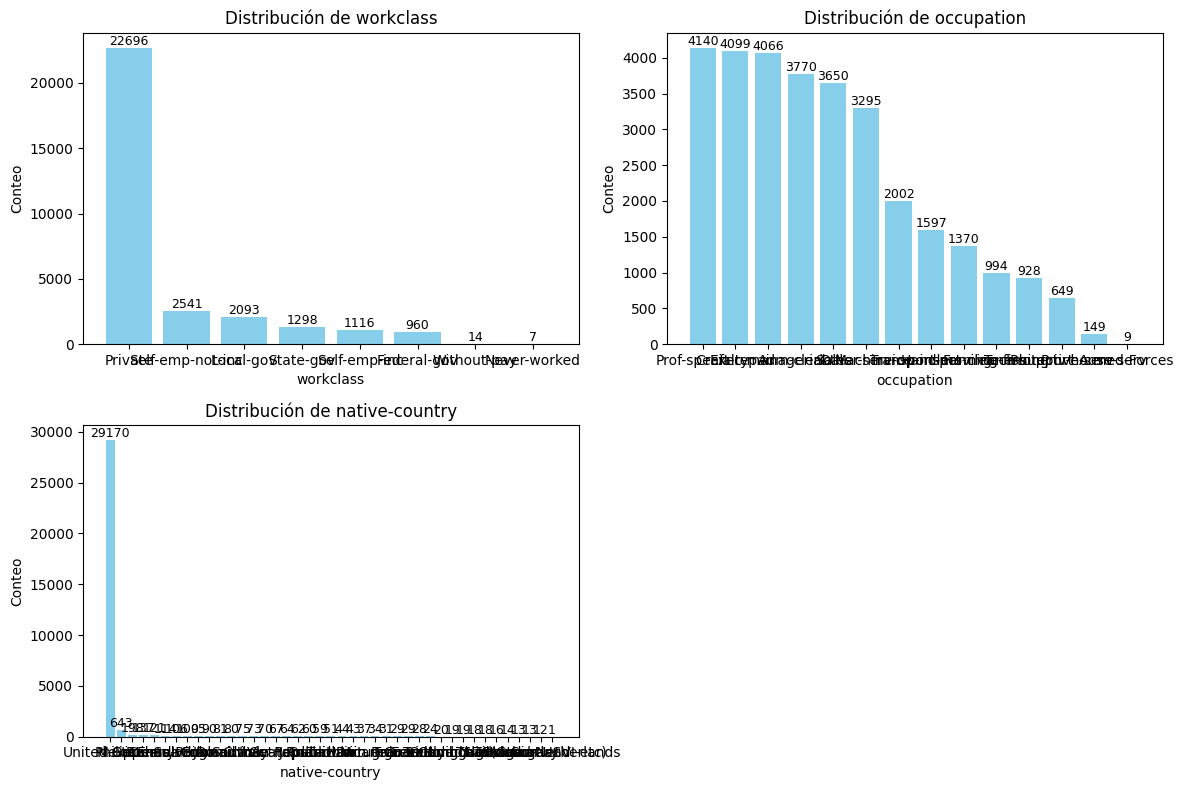

In [ ]:
import matplotlib.pyplot as plt

def check_col_plt(df, columns):
    num_plots = len(columns)
    # Definimos el número de filas y columnas del grid. En este ejemplo usamos 2x2.
    rows, cols = 2, 2

    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()  # Aplanamos la matriz de ejes para iterar fácilmente

    for i, col in enumerate(columns):
        ax = axes[i]
        # Obtenemos la cuenta de cada valor único en la columna
        count_data = df[col].value_counts().reset_index()
        count_data.columns = [col, 'count']

        # Creamos el gráfico de barras
        bars = ax.bar(count_data[col].astype(str), count_data['count'], color='skyblue')
        ax.set_title(f"Distribución de {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Conteo")

        # Añadimos las etiquetas de conteo encima de cada barra
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)

    # Eliminamos los ejes sobrantes si hay menos plots que subplots
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
ncolumns = ["workclass", "occupation", "native-country"]
check_col_plt(data, ncolumns)


native y work class estan claros pero hay que decidir que hacer con los valores perdidos de occupation

In [ ]:


def transformar_income(X): 
    """Transforma la columna 'income' en una variable binaria."""

    X = X.copy()
    X['income'] = X['income'].str.strip().map({'<=50K': 0, '>50K': 1})
    return X

def separar_x_y(data):
    X = data.drop('income', axis=1)
    y = data['income']
    return X, y

def transformar_categoricas_a_binarias(X): 

    X = X.copy()
    dummies = pd.get_dummies(X, columns=variables_categoricas_binarias)
    if hasattr(transformar_categoricas_a_binarias, 'dummy_columns'):
        dummies = dummies.reindex(columns=transformar_categoricas_a_binarias.dummy_columns, fill_value=0)
    else:
        transformar_categoricas_a_binarias.dummy_columns = dummies.columns
    return dummies
binary_transformer = FunctionTransformer(transformar_categoricas_a_binarias)

# variables_categoricas_binarias = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
variables_categoricas_binarias = categorical_cols

# Definimos el pipeline con el transformador
pipeline = Pipeline([
    ('transformar_categoricas', binary_transformer),
    ('classifier', KNeighborsClassifier())
])

X, y = separar_x_y(transformar_income(data))
# Aplicamos el pipeline a los datos
pipeline.fit(X, y)
# print(y)

predicciones = pipeline.predict(X)
print(roc_auc_score(y, predicciones))
print(accuracy_score(y, predicciones))  
# Mostramos las primeras filas para verificar la transformación
# print(data_transformed.head())
# mostrar unas filas concretas
# print(data_transformed.loc[10:15])

0.7093285945298734
0.8357237185590123
